<img src='new_img/odsc.png'>


## Julia Lintern
####  Data Science Instructor @ [Metis](thisismetis.com)

####  04/19/2022

#####  Please connect with me on [LinkedIn](www.linkedin.com/in/julia-lintern-a5141384)  and [github](https://github.com/julialintern)

#   Intro to Deep Learning using Keras and Tensorflow

<img src='new_img/entree.png' align='middle'/>

# Neural Net Intro

<img src='new_img/neuron1.png' align='middle'/>

<img src='new_img/neuron2.png' align='middle'/>


<img src='new_img/title.png'/>

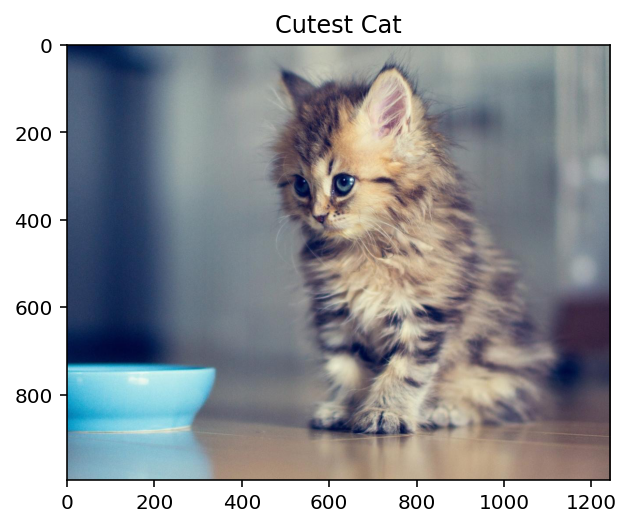

In [1]:
%matplotlib inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

#######################
#       imports       #
#######################
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt


from scipy import ndimage
img=plt.imread('new_img/cutest.jpg')
plt.imshow(img);
plt.title('Cutest Cat');

In [2]:
# our image as array 
print(img.shape)
print('\n')
# printing first channel of RGB image
print(img[:,:,0])

(995, 1244, 3)


[[  4   4   4 ... 145 146 146]
 [  4   4   3 ... 145 146 146]
 [  4   4   3 ... 147 148 148]
 ...
 [126 127 128 ... 141 142 143]
 [125 126 127 ... 136 137 138]
 [124 125 126 ... 139 140 141]]



<img src='new_img/matrix3.png'/>



<img src='new_img/cross_ent.png'>


$$ Softmax:   f_j(z)={{{e^{z_j}}\above 1pt\sum_k e^{z_k}}}$$

$$ Cross Entropy:   L_i= -\sum_j t_j log(f_j(z))$$      
             ( Cross Entropy ~ Negative log probability for the correct label)


In [3]:
import numpy as np

W=np.array([[.3,-.22,-.75,1],[.03,.33,.77,.27],[.51,-.73,-.37,-.39]])
inp= np.array([4,4,3,12])
bias=[.58,.11,.49]

Z= np.dot(W,inp) + bias
Z

array([10.65,  7.1 , -6.18])

In [4]:
softmax=np.exp(Z)/np.sum(np.exp(Z))
softmax

array([9.72077380e-01, 2.79225725e-02, 4.77006950e-08])

In [5]:
-np.log(softmax)

array([ 0.02831987,  3.57831987, 16.85831987])

<img src='new_img/mnist.png'/>

$$W_{1,1}x_1 + W_{1,2}x_2 + W_{1,3}x_3  + b_1     =    y_1$$
$$W_{2,1}x_1 + W_{2,2}x_2 + W_{2,3}x_3  + b_2     =    y_2$$
$$W_{3,1}x_1 + W_{3,2}x_2 + W_{3,3}x_3  + b_3     =    y_3$$

$$  ....  $$ 
$$  ....  $$

<img src='new_img/mnist2.png'/>

<img src='new_img/mnist_wt.png' align='middle'/>

<img src='new_img/deep.png' align='middle'/>
<img src='new_img/layers2.png' align='middle'/>

<img src='new_img/xor.png' align='middle'/>

<img src='new_img/dl_timeline.png' align='middle'/>

In [6]:
def plot_decision_boundary(pred_func, x, y, ax=None, points=1e3,
                           pal=dict(enumerate(sns.color_palette("husl", 4))),
                           margin_func=None, alpha=.1):
    """Plots the decision boundary for a function that generates a prediction.
    Args:
        pred_func (function): Function that returns integer category labels for `x`.
        x (array): [2 x n] array.
        y (array): any-dimensional array (will be flattened)
        ax (axis): matplotlib axis. None generates our own.
        points (floatlike): number of points we wish to generate
        pal: pallete of colors for each class label
        margin_func: optional function for generating margins (drawn at margin = ±1)
        alpha: transparency of scatterplot points
    Returns:
        None
    """
    if ax is None:
        fig, ax = plt.subplots()

    y_pred = pred_func(x)
    score = metrics.accuracy_score(y_pred.flatten(), y.flatten())

    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, alpha=alpha, edgecolor=None,
                    palette=pal, ax=ax)

    side_pts = int(np.sqrt(points))

    x0_min, x0_max = ax.get_xlim()
    x1_min, x1_max = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(x0_min, x0_max, num=side_pts),
        np.linspace(x1_min, x1_max, num=side_pts))

    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.text((x0_min + x0_max) / 2, x1_min + (x1_max - x1_min) * .1,
            f"acc: {score:.1%}", bbox=dict(boxstyle="round", fc="white",
                                           ec="black"))

    ax.contourf(xx, yy, Z, alpha=0.2, colors=list(pal.values()), zorder=-1)

    if not (margin_func is None):
        Z = margin_func(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        # plot decision boundary and margins
        ax.contour(xx, yy, Z, colors='k', levels=[-1, 1], alpha=0.5,
                   linestyles=['--', '--'], zorder=0)

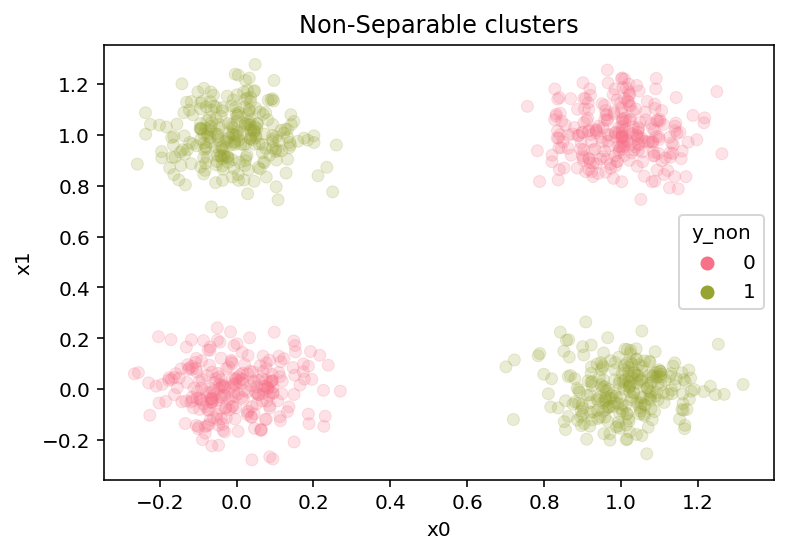

In [7]:
from sklearn import datasets

pal = dict(enumerate(sns.color_palette("husl", 4)))

x, y = datasets.make_blobs(n_samples=1000, n_features=2,
                           centers=[[0, 0], [0, 1], [1, 0],
                                    [1, 1]], cluster_std=.1, random_state=0)

blob_df = pd.DataFrame({"x0": x[:, 0], "x1": x[:, 1], "y": y})

blob_df["y_non"] = blob_df.y.isin([1, 2]).astype("int")

sns.scatterplot(x="x0", y="x1", hue="y_non", data=blob_df, alpha=.2,
                edgecolor=None, palette=pal)
plt.title("Non-Separable clusters");

In [12]:
from tensorflow import keras
logreg_keras = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=(2, )),
    keras.layers.Activation("sigmoid")
])

logreg_keras.compile(optimizer="sgd", loss="binary_crossentropy")

logreg_keras.fit(x=blob_df[["x0", "x1"]], y=blob_df["y_non"], epochs=20)

2022-04-17 05:17:46.310283: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-17 05:17:46.311359: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-17 05:17:46.372504: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/20
32/32 [==============================] - 0s 353us/step - loss: 0.7361
Epoch 2/20
32/32 [==============================] - 0s 303us/step - loss: 0.7240
Epoch 3/20
32/32 [==============================] - 0s 384us/step - loss: 0.7168
Epoch 4/20
32/32 [==============================] - 0s 351us/step - loss: 0.7291
Epoch 5/20
32/32 [==============================] - 0s 325us/step - loss: 0.7135
Epoch 6/20
32/32 [==============================] - 0s 354us/step - loss: 0.7031
Epoch 7/20
32/32 [==============================] - 0s 345us/step - loss: 0.7179
Epoch 8/20
32/32 [==============================] - 0s 324us/step - loss: 0.7043
Epoch 9/20
32/32 [==============================] - 0s 323us/step - loss: 0.6995
Epoch 10/20
32/32 [==============================] - 0s 359us/step - loss: 0.7047
Epoch 11/20
32/32 [==============================] - 0s 346us/step - loss: 0.7077
Epoch 12/20
32/32 [==============================] - 0s 337us/step - loss: 0.7088
Epoch 13/20
32/32 [======

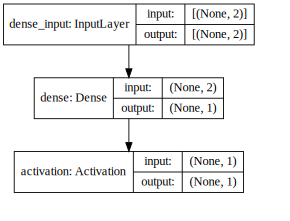

In [13]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model
SVG(model_to_dot(logreg_keras,show_shapes=True,dpi=64).create(prog='dot',format='svg'))

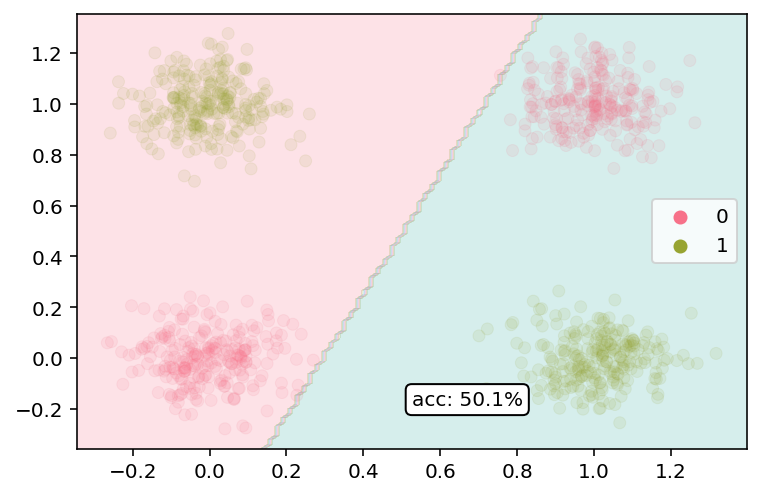

In [14]:
pred_func = lambda x: logreg_keras.predict(x) > .5

plot_decision_boundary(pred_func, x=blob_df[["x0", "x1"]].values,
                       y=blob_df["y_non"].values, points=1e4)

In [21]:
# engineer interaction feature
#blob_df["x0*x1"] = blob_df["x0"]*blob_df["x1"]

# build model. Now our input is size 3
logreg_keras = keras.Sequential([
    keras.layers.Dense(units=8, input_shape=(2, ),activation='relu'),
    keras.layers.Dense(units=1),
    keras.layers.Activation("sigmoid")
])

logreg_keras.compile(optimizer="sgd", loss="binary_crossentropy")

logreg_keras.fit(x=blob_df[["x0", "x1"]], y=blob_df["y_non"], epochs=20)

Epoch 1/20
32/32 [==============================] - 0s 415us/step - loss: 0.6989
Epoch 2/20
32/32 [==============================] - 0s 438us/step - loss: 0.6959
Epoch 3/20
32/32 [==============================] - 0s 394us/step - loss: 0.6923
Epoch 4/20
32/32 [==============================] - 0s 359us/step - loss: 0.6849
Epoch 5/20
32/32 [==============================] - 0s 347us/step - loss: 0.6813
Epoch 6/20
32/32 [==============================] - 0s 377us/step - loss: 0.6756
Epoch 7/20
32/32 [==============================] - 0s 358us/step - loss: 0.6698
Epoch 8/20
32/32 [==============================] - 0s 357us/step - loss: 0.6687
Epoch 9/20
32/32 [==============================] - 0s 345us/step - loss: 0.6627
Epoch 10/20
32/32 [==============================] - 0s 362us/step - loss: 0.6582
Epoch 11/20
32/32 [==============================] - 0s 366us/step - loss: 0.6544
Epoch 12/20
32/32 [==============================] - 0s 356us/step - loss: 0.6525
Epoch 13/20
32/32 [======

In [23]:
logreg_keras.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


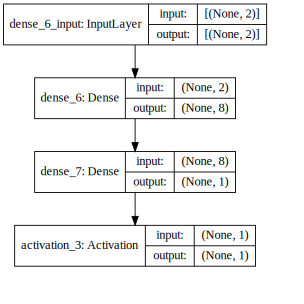

In [22]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model
SVG(model_to_dot(logreg_keras,show_shapes=True,dpi=64).create(prog='dot',format='svg'))

<img src='new_img/layers2.png' align='middle'/>

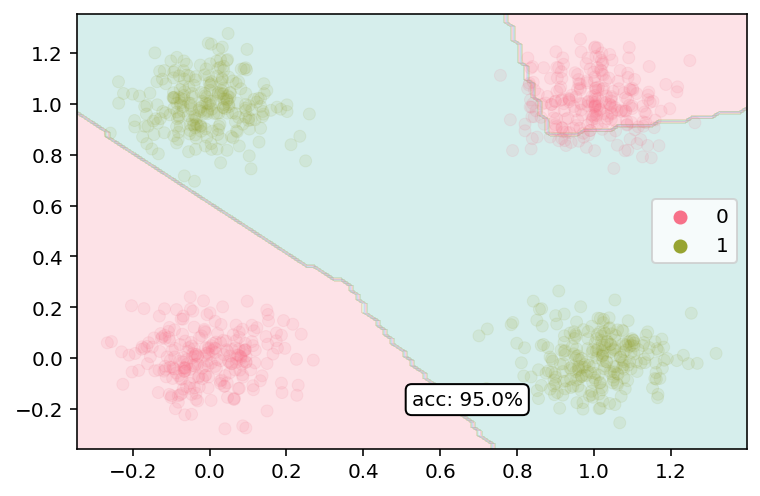

In [19]:
pred_func = lambda x: logreg_keras.predict(np.stack((x[:,0], x[:,1]), axis=1)) > .5

plot_decision_boundary(pred_func, x=blob_df[["x0", "x1"]].values,
                       y=blob_df["y_non"].values, points=1e4)

<img src='new_img/convex.png'/>

<img src='new_img/non_convex.png'/>

Why do neural nets have to be non-convex? 

- neural nets are universal function approximators (with enough neurons they can approximate any function fairly well!)
- Thus, they will need to approximate non-convex functions  ( convex functions can't approximate non-convex very well)
- Note : although neural nets may be composed of convex parts (composition of convex functions is not convex)


<img src='new_img/backprop5.png'/>



### The Chain rule! 

Let's focus on **w5**.   How can we update this weight?

$$net_{o1}= h_{1}*w_5 + h_2*w_7+b$$  

$$out_{o1}= {{1}\above 1pt (1+e^{-net_{o1}})}$$

$$E_{total}= 1/2\sum(target-out)^2$$

How do we calculate : $${dE_{total}\above 1pt dw_5} ?$$ 



$${dE_{total}\above 1pt dout_{o1}}=2*1/2(target_{o1}-out_{o1})$$

$${dout_{o1}\above 1pt dnet_{o1}}=out_{o1}*(1-out_{o1})$$

$${dnet_{o1}\above 1pt dw_{5}}=h_{1}$$


$${dE_{total}\above 1pt dw_5} = {dE_{total}\above 1pt dout_{o1}}{dout_{o1}\above 1pt dnet_{o1}}{dnet_{o1}\above 1pt dw_{5}}$$ 

<h1><center><font color='#F87217'> KERAS  </font></center></h1>

<h4><center><font color='black'><s> High-Level Deep Learning Library for Theano & Tensorflow </s>  </font></center></h4>
 
<h3><center><font color='black'> High-Level Deep Learning Library for Tensorflow  </font></center></h3>

[Keras](https://keras.io/about/#keras-amp-tensorflow-2) was developed to allow for fast deep-learning prototyping through the use of: 
 - high-level building blocks for deep-learning 
 - run on CPU or GPU
 - Keras is the high-level API of [TensorFlow 2](https://www.tensorflow.org/guide/migrate/tf1_vs_tf2)

In [ ]:
from tensorflow import keras

In [ ]:
import warnings # m1 chip version comes with a lot of warnings, just turning off for now
warnings.filterwarnings('ignore')

import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Input
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.utils import model_to_dot, plot_model
from tensorflow.keras.utils import to_categorical

from IPython.display import SVG
import seaborn as sns

import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 2000)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


### Let's get some data

In [ ]:
#sns.set_style('white')

iris=datasets.load_iris()
X=iris.data
y=iris.target

data=pd.DataFrame(X)
data['target']=y

In [ ]:
data['name']=data.target.astype('str').replace({'0':'setosa','1':'versicolor','2':'virginica'})

In [ ]:
# let's generate a quick plot of our data
plt.figure(figsize=(10,7));
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis_r')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Iris Data');

## `Keras` Models
- The core objects in `Keras` are `Models` and `Layers`
- `Models` set up the container for your network
- `Layers` fill in the architecture (connections, unit types, activation functions, etc)
- The 2 options for `Models`:
  - `Sequential`: The basic one we'll start with  
  - Function API: Specify complex models (ie : multiple inputs ) 
  
### The [Sequential](https://keras.io/guides/sequential_model/) Model
Allows you to stack all sorts of layers in your network

### Feedforward Nets
Neural Networks maximize flexibility. They are appropriate in cases where we shouldn't make assumptions about relationships between our input features. They do especially well on tabular data, like the dataframes we've seen so far. 

Other important techniques of deep learning:
- **Embeddings** are a technique for learning efficient relationships between categories.
- **Convolutional** Neural Networks are use to model spatial relationships. They are particularly useful in image and audio tasks but have many more applications.
- **Recurrent** Neural Networks are used to model sequences of data, like sentences or time series


##  Let's create our first Model

In [ ]:
model=Sequential()  
model.add(Dense(units=3,input_dim=4))  # output: # classes,input: # of features
model.add(Activation("softmax"))

In [ ]:
SVG(model_to_dot(model,show_shapes=True,dpi=64).create(prog='dot',format='svg'))

In [ ]:
# encode class values to integers
encoder=LabelEncoder()
encoder.fit(y)
enc_y=encoder.transform(y)
# one hot encode the integers
one_hot_y=to_categorical(enc_y)
one_hot_y[:5]

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y, test_size=0.33, random_state=123)

# compile: need to specify our loss function, optimizer & metric
#model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
#model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

In [ ]:
### Let's skip the one-hot-encoding, 

In [ ]:
model=Sequential()  
model.add(Dense(units=3,input_dim=4))  # output: # classes,input: # of features
model.add(Activation("softmax"))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=123)
# asking our model to keep track of accuracy while we are at it, 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# create a fit object
fit=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

In [ ]:
# lot's plot our history

plt.plot(range(10),fit.history['accuracy'],c='lightblue',marker='+',label='Train')
plt.plot(range(10),fit.history['val_accuracy'],c='purple',marker='+',label='Test')
plt.legend()
plt.title('Train & Test Accuracy for a Deeper Network');""

###  So wait, what did we just do ?


### Let's try it again..

In [33]:
# take two! 
model=Sequential()   
model.add(Dense(units=64,input_dim=4))  # Note: we are making our network wider,
model.add(Activation("relu"))
model.add(Dense(units=32)) # We are making our network longer :)
model.add(Activation("relu"))
model.add(Dense(units=3))
model.add(Activation("softmax"))

In [34]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# adding early stopping (monitors val_loss)
cb=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')
fit=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32,callbacks=[cb])

Epoch 1/10
4/4 [==============================] - 0s 29ms/step - loss: 1.2580 - accuracy: 0.2505 - val_loss: 1.2497 - val_accuracy: 0.4000
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 1.1254 - accuracy: 0.5240 - val_loss: 1.1345 - val_accuracy: 0.5800
Epoch 3/10
4/4 [==============================] - 0s 7ms/step - loss: 1.0262 - accuracy: 0.6930 - val_loss: 1.0184 - val_accuracy: 0.5200
Epoch 4/10
4/4 [==============================] - 0s 8ms/step - loss: 0.9682 - accuracy: 0.5625 - val_loss: 0.9409 - val_accuracy: 0.4000
Epoch 5/10
4/4 [==============================] - 0s 7ms/step - loss: 0.9125 - accuracy: 0.5556 - val_loss: 0.8899 - val_accuracy: 0.6200
Epoch 6/10
4/4 [==============================] - 0s 8ms/step - loss: 0.8753 - accuracy: 0.6953 - val_loss: 0.8405 - val_accuracy: 0.8400
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 0.8369 - accuracy: 0.7547 - val_loss: 0.7984 - val_accuracy: 0.8600
Epoch 8/10
4/4 [=================

In [1]:
#print(fit.history)

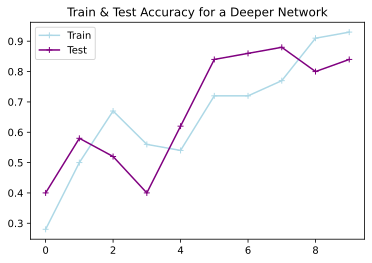

In [35]:
# lot's plot our history

plt.plot(range(10),fit.history['accuracy'],c='lightblue',marker='+',label='Train')
plt.plot(range(10),fit.history['val_accuracy'],c='purple',marker='+',label='Test')
plt.legend()
plt.title('Train & Test Accuracy for a Deeper Network');

###  What can be gained by making the network wider & deeper?   

 - [Wide nets can be quite good at memorization](https://stats.stackexchange.com/questions/222883/why-are-neural-networks-becoming-deeper-but-not-wider)
 -  A deep network can be quite good at generalization
 
 <img src='new_img/VGG.png'/>

##  Code-Along
#### Objective: 
- Continue working with the Iris dataset, build another model that improves the accuracy further.
- Experiment with differnt [optimizers!](https://keras.io/optimizers/)
- Try to get > .95 accuracy.

In [ ]:
# Enter your code here

###  Game-Changers for Deep-Learning
 - hardware & data 


Until late 2000s, we were still missing reliable ways to train deep neural nets (as a result networks were still very shallow)  Key issue: gradient propagation : key signal would fade away as we added layers
This changes around 2009 with the introduction of several key improvements :
- Better activation functions
- Better weight initialization schemes: we'll stick with the default initializer [glorot uniform](keras.initializers.glorot_uniform(seed=None)
- Better optimization techniques, such as [rmsProp & adam](https://keras.io/optimizers/)
                                                                                

 ## A word about optimization: 
 
**SGD recap**

$W_{new}=W_{old}- (\alpha)*\nabla J$

**Momentum**:  
allows the search to build momentum (via exponential moving averages) in a direction in the search space and overcome the oscillations of noisy gradients 
  
$V_t=\eta*V_{t-1}- (\alpha)*\nabla J$   
$W_{new}=W_{old}- V_t$

$\eta : $ Coefficient of Momentum  
$\eta  =~ .9$


<img src='new_img/momentum.png'>




**Rmsprop**: allows for 
Damping out large oscillations (if we dividing by large # (because of large #) in Eqn 2, then we will ultimately slow down the learning

(Eqn 1) $V_t=\rho*V_{t-1}+ (1-\rho)*g_t^2$  
(Eqn 2) $\nabla\omega_t= -\frac{\alpha}{\sqrt(V_t)}*g_t$  
$W_{t+1}=W_{t}+\nabla W_{t}$

$\rho~=$ .9  (initial learning rate) 
$V_t$ ~ Exponential average of squares of gradients
$g_t ~ gradient at time t


**Adam**   
A combination of momentum & rmsprop   
$\theta=\theta -\alpha(V_t)/\sqrt(S_t)$
